In [8]:
from solarium.benchmarks import MCMR_Crosstalk_Experiment
from selene_sim import DepolarizingErrorModel, Stim, Quest
from pecos_selene import PecosGeneralErrorModel

In [2]:
from collections import Counter
from hugr.qsystem.result import QsysResult
from selene_sim import build, Stim
from pecos_selene import qsystem_model_alpha
from selene_anduril import AndurilRuntimePlugin as AndurilRuntime
from selene_sim import SimpleLeakageErrorModel
from selene_eldarion import register_eldarion, QtmPlatformPlugin
register_eldarion()

In [3]:
# index of focus qubit(s) that receives repeated MCMR.  Must be chosen from the zone qubits (q[0:15]) .  
focus_qubits = [0,2]

seq_lengths = [10] #  intermediate shot lengths needed to resolve possible quadratic dependencies (memory error).

# datetime labelling ensures that the pickle filename is unique and informative.
import datetime
x = datetime.datetime.now()
filename = f'./exp_MCMR_Crosstalk_q{focus_qubits}_{x}.p'#print(filename)

exp = MCMR_Crosstalk_Experiment(focus_qubits, seq_lengths, filename=filename)
exp.add_settings()

In [4]:
# or load an existing experiment from working directory

# filename = <Insert filename>
# exp = MCMR_Crosstalk_Experiment.load(filename)

### Run local simulation using Selene

In [9]:
# Setup error model

error_model = PecosGeneralErrorModel(
    p_meas_crosstalk=1e-4,
    p_prep_crosstalk=1e-4
)

#error_model = qsystem_model_alpha(random_seed=12, p_meas_crosstalk=1e-5,p_prep_crosstalk=1e-5)


In [10]:
# simulate experiment

shots = 10
simulator = Stim()

exp.sim(shots, error_model = error_model, simulator=simulator, eldarion=True, extensions=[QtmPlatformPlugin()])


Simulating ...
1/6 circuits complete
2/6 circuits complete
3/6 circuits complete
4/6 circuits complete
5/6 circuits complete
6/6 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [ ]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

In [ ]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='MCMR-crosstalk-example-project')
qnexus.context.set_active_project(project)

# device_name = 'Helios-1' to submit to hardware.
# stabilizer sim needed for 98 qubit job.
backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000) 

In [ ]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [ ]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Retrieve experiment results

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk.py:250: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y)


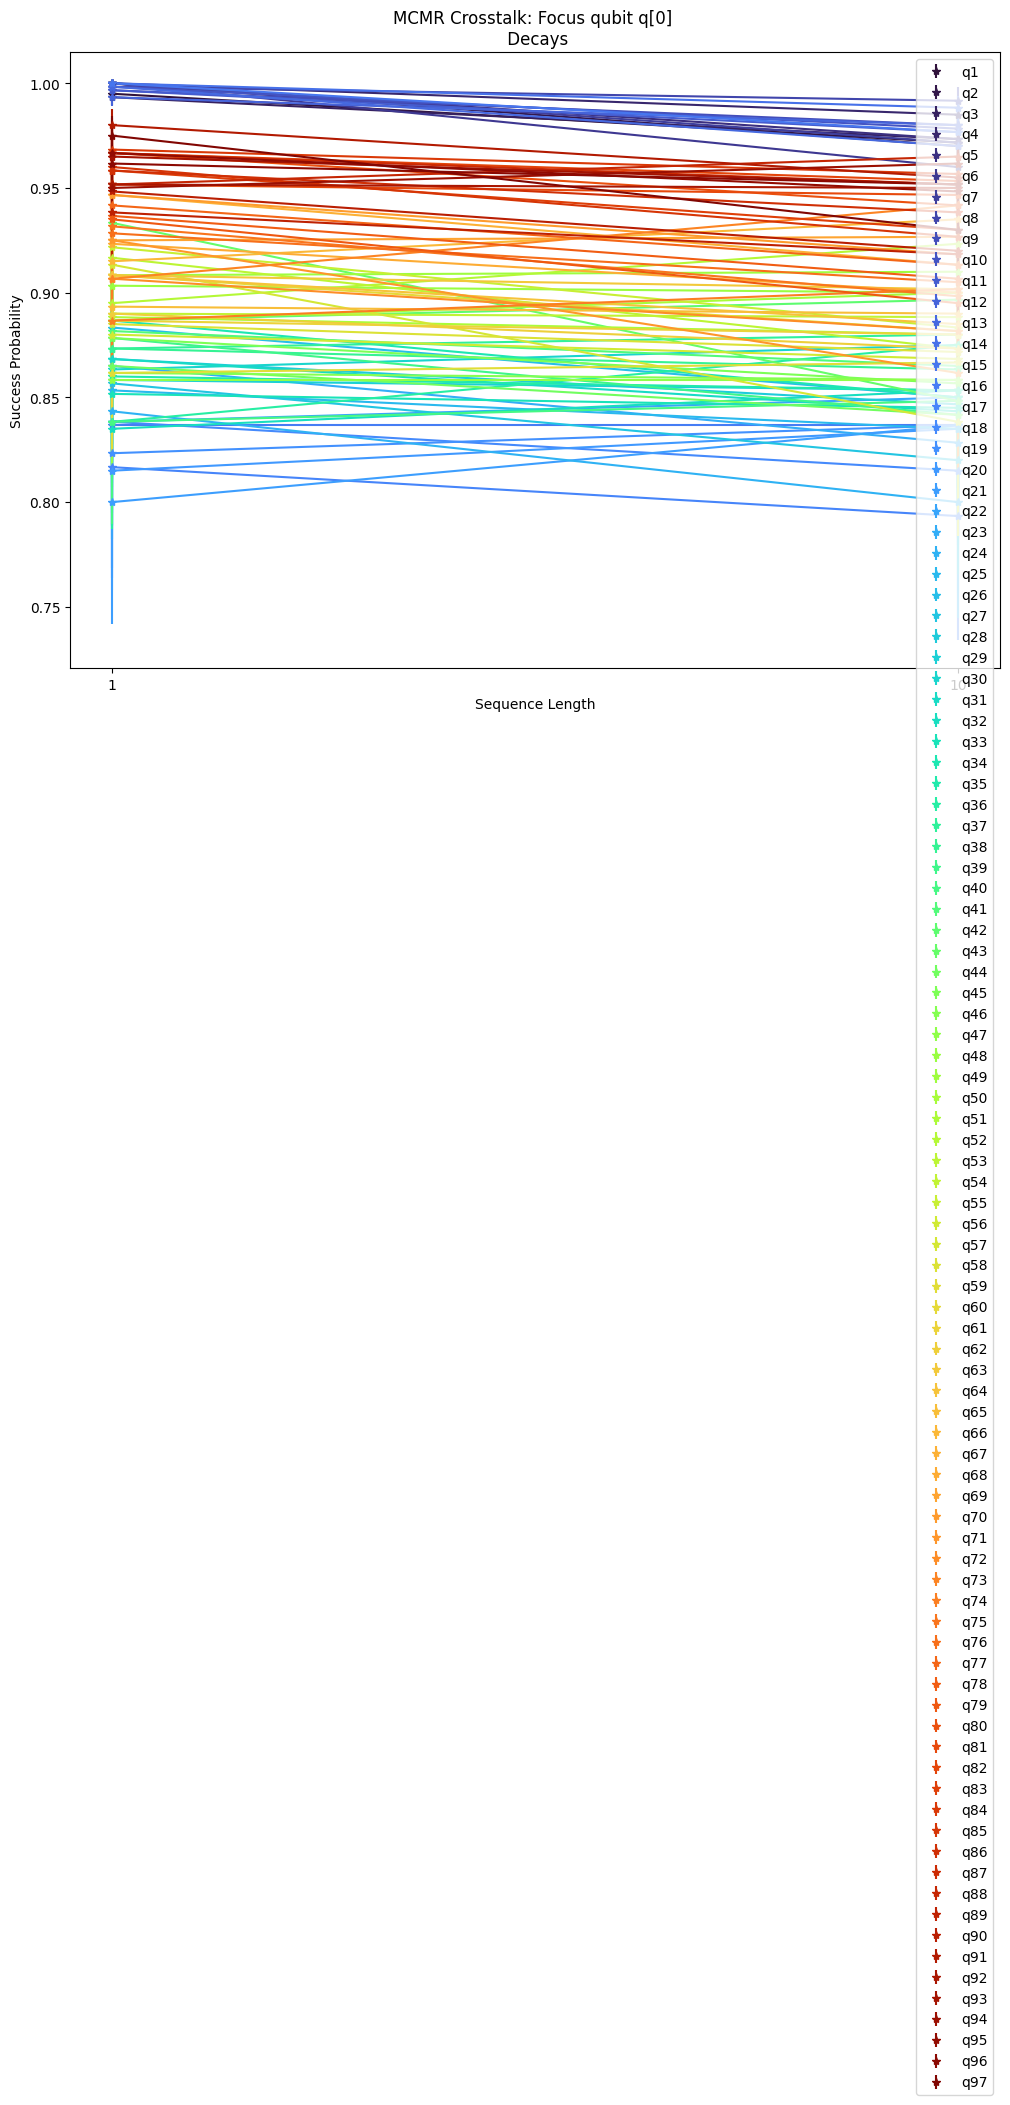

Average State Infidelities
------------------------------
qubit 1: 0.002593 +/- 0.001865
qubit 2: 0.003333 +/- 0.001332
qubit 3: 0.002222 +/- 0.001452
qubit 4: 0.001667 +/- 0.000755
qubit 5: 0.002963 +/- 0.001106
qubit 6: 0.004444 +/- 0.001571
qubit 7: 0.003148 +/- 0.001339
qubit 8: 0.000741 +/- 0.000786
qubit 9: 0.001852 +/- 0.001025
qubit 10: 0.002222 +/- 0.001264
qubit 11: 0.002222 +/- 0.001313
qubit 12: 0.001481 +/- 0.001029
qubit 13: 0.003148 +/- 0.001273
qubit 14: 0.001296 +/- 0.000646
qubit 15: 0.002593 +/- 0.001139
qubit 16: 0.0 +/- 0.006903
qubit 17: 0.002593 +/- 0.009237
qubit 18: 0.002593 +/- 0.007878
qubit 19: -0.001481 +/- 0.007974
qubit 20: -0.002222 +/- 0.008816
qubit 21: -0.004074 +/- 0.008852
qubit 22: -0.001296 +/- 0.008477
qubit 23: 0.004074 +/- 0.007475
qubit 24: 0.004815 +/- 0.007972
qubit 25: 0.002037 +/- 0.008364
qubit 26: 0.003704 +/- 0.006851
qubit 27: 0.004074 +/- 0.008008
qubit 28: 0.002407 +/- 0.006602
qubit 29: 0.000556 +/- 0.0077
qubit 30: -0.001296 +/- 0.

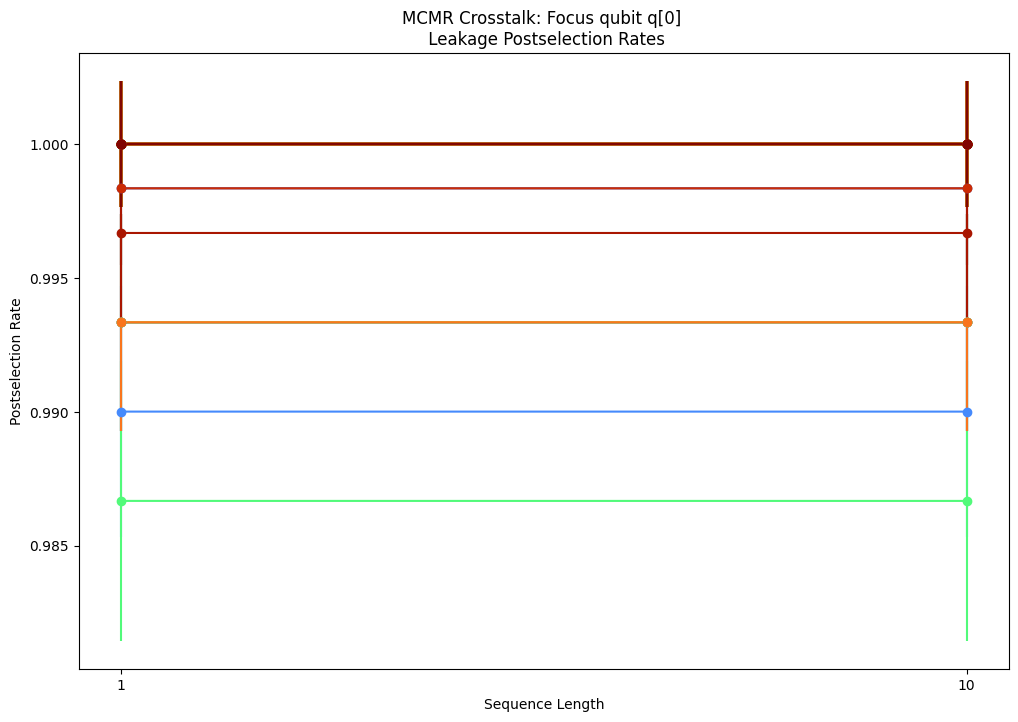

Average leakage rates
------------------------------
qubit 1: 0.0 +/- 0.000369
qubit 2: 0.0 +/- 0.000369
qubit 3: 0.0 +/- 0.000637
qubit 4: 0.0 +/- 0.000369
qubit 5: 0.0 +/- 0.000369
qubit 6: 0.0 +/- 0.000369
qubit 7: 0.0 +/- 0.000369
qubit 8: 0.0 +/- 0.000369
qubit 9: 0.0 +/- 0.000452
qubit 10: 0.0 +/- 0.000369
qubit 11: 0.0 +/- 0.000369
qubit 12: 0.0 +/- 0.000637
qubit 13: 0.0 +/- 0.000369
qubit 14: 0.0 +/- 0.000369
qubit 15: 0.0 +/- 0.000369
qubit 16: 0.0 +/- 0.000369
qubit 17: 0.0 +/- 0.000369
qubit 18: 0.0 +/- 0.000735
qubit 19: 0.0 +/- 0.000369
qubit 20: 0.0 +/- 0.000369
qubit 21: 0.0 +/- 0.000369
qubit 22: 0.0 +/- 0.000369
qubit 23: 0.0 +/- 0.000369
qubit 24: 0.0 +/- 0.000369
qubit 25: 0.0 +/- 0.000369
qubit 26: 0.0 +/- 0.000369
qubit 27: 0.0 +/- 0.000369
qubit 28: 0.0 +/- 0.000369
qubit 29: 0.0 +/- 0.000369
qubit 30: 0.0 +/- 0.000369
qubit 31: 0.0 +/- 0.000369
qubit 32: 0.0 +/- 0.000369
qubit 33: 0.0 +/- 0.000369
qubit 34: 0.0 +/- 0.000369
qubit 35: 0.0 +/- 0.000369
qubit 36: 0

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk.py:600: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y) #, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))


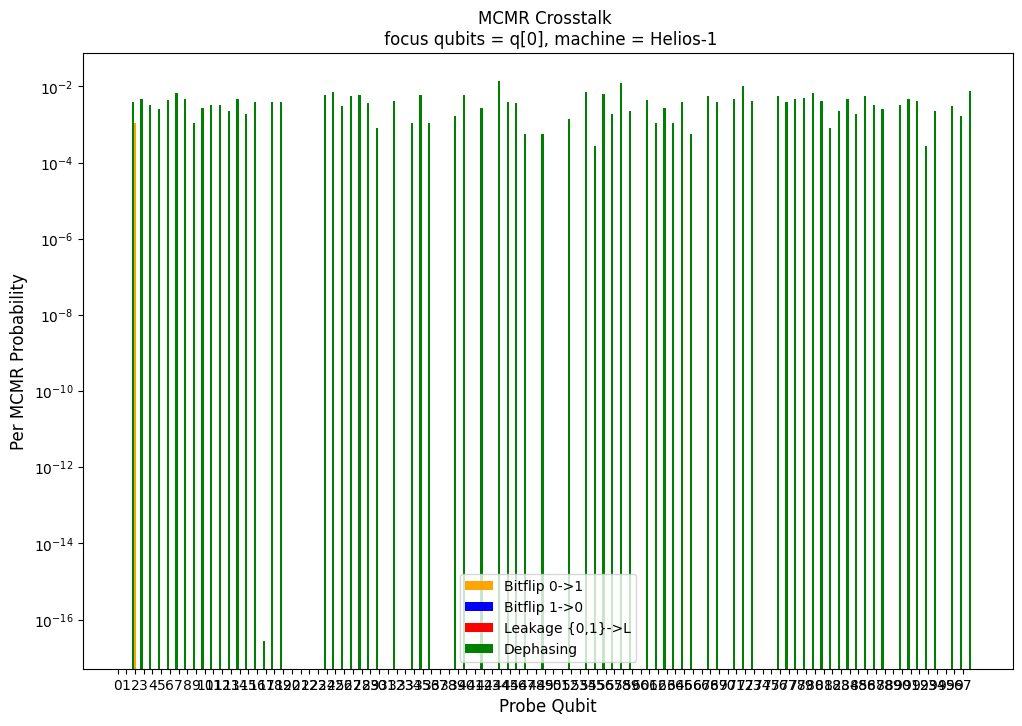

Average error rates
--------------------------------------------------
Bitflip 0->1: 1.1e-05 +/- 1.1e-05
Bitflip 1->0: 0.0 +/- 0.0
Leakage {0,1}->L: 0.0 +/- 0.0
Dephasing: 0.002466 +/- 0.000363
--------------------------------------------------


Error channel estimates of fidelities
--------------------------------------------------
Average state infidelity:  0.001646
Average process infidelity:  0.002468
--------------------------------------------------






In [14]:
# qubits 0-15 reflect crosstalk in the gatezone.
# qubits 16-97 reflect crosstalk in the gatezone.

# perhaps there's a more elegant way to give the results that breaks it up into gatezone/ring...
exp.analyze_results()

In [27]:
# save experiment object to working directory

exp.save()

In [4]:
# (Optional) generate dfl
# requires qmcparser:  https://co41-bitbucket.honeywell.lab:4443/projects/TBC/repos/qmcparser/browse

from qmcparser.parser import get_dfl

# I like to make a subfolder for dfl.
output_filename = f'./dfl/dfl_MCMR_Crosstalk_Pauli_98_qubits_q{focus_qubits}_{x}.cl'

# which circuit do you want the dfl for?
job_ind = -1
dfl = get_dfl(exp.make_circuit(exp.settings[job_ind]), output_file_name=output_filename)

Processing shot 0
